In [481]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
import pickle as pkl
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## Importing Data

In [482]:
df = pd.read_csv("../data/troop_movements.csv")
df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2025-07-09 09:16:19,1,tie_fighter,resistance,5,4,6,9,Chandrila
1,2025-07-09 09:16:18,2,at-st,resistance,3,4,5,7,Socorro
2,2025-07-09 09:16:17,3,resistance_soldier,empire,7,2,3,3,Champala
3,2025-07-09 09:16:16,4,tie_fighter,resistance,5,8,10,3,Dathomir
4,2025-07-09 09:16:15,5,unknown,resistance,7,8,6,10,Tholoth
...,...,...,...,...,...,...,...,...,...
995,2025-07-09 08:59:44,996,at-at,resistance,5,9,9,4,Socorro
996,2025-07-09 08:59:43,997,at-at,resistance,6,7,4,1,Trandosha
997,2025-07-09 08:59:42,998,tie_fighter,empire,8,7,10,4,Ojom
998,2025-07-09 08:59:41,999,tie_fighter,resistance,8,1,8,9,Cerea


## Visualize Data

In [483]:
features = ['homeworld', 'unit_type']

In [484]:
df.groupby('empire_or_resistance').size().reset_index(name='counts')

,empire_or_resistance,counts
0,empire,517
1,resistance,483


In [485]:
df.groupby('homeworld').size().reset_index(name='counts')

,homeworld,counts
0,Alderaan,21
1,Aleen Minor,16
2,Bestine IV,25
3,Cerea,21
4,Champala,25
5,Chandrila,21
6,Concord Dawn,15
7,Corellia,27
8,Dagobah,24
9,Dathomir,21


In [486]:
df.groupby('unit_type').size().reset_index(name='counts')

,unit_type,counts
0,at-at,117
1,at-st,111
2,resistance_soldier,125
3,stormtrooper,128
4,tie_fighter,150
5,tie_silencer,117
6,unknown,147
7,x-wing,105


In [487]:
df['is_resistance'] = df['empire_or_resistance'] == 'resistance'
df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2025-07-09 09:16:19,1,tie_fighter,resistance,5,4,6,9,Chandrila,True
1,2025-07-09 09:16:18,2,at-st,resistance,3,4,5,7,Socorro,True
2,2025-07-09 09:16:17,3,resistance_soldier,empire,7,2,3,3,Champala,False
3,2025-07-09 09:16:16,4,tie_fighter,resistance,5,8,10,3,Dathomir,True
4,2025-07-09 09:16:15,5,unknown,resistance,7,8,6,10,Tholoth,True
...,...,...,...,...,...,...,...,...,...,...
995,2025-07-09 08:59:44,996,at-at,resistance,5,9,9,4,Socorro,True
996,2025-07-09 08:59:43,997,at-at,resistance,6,7,4,1,Trandosha,True
997,2025-07-09 08:59:42,998,tie_fighter,empire,8,7,10,4,Ojom,False
998,2025-07-09 08:59:41,999,tie_fighter,resistance,8,1,8,9,Cerea,True


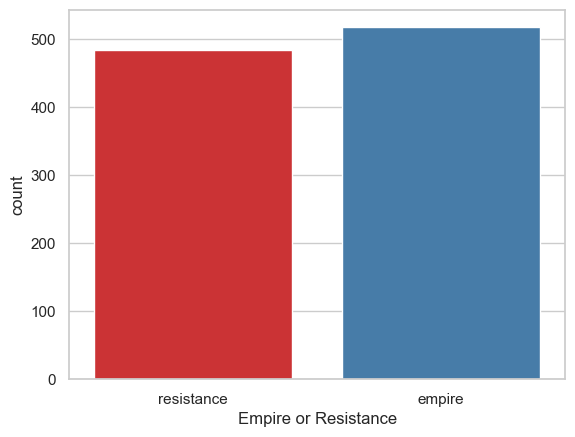

In [488]:
sns.set_theme(style='whitegrid')
sns.countplot(x = 'empire_or_resistance', data=df, palette="Set1", hue='empire_or_resistance', legend=False)
plt.xlabel('Empire or Resistance')
plt.show()

## Creating train and Test Data

In [489]:
X = df[features]
y = df['is_resistance']
X = pd.get_dummies(X)

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [491]:
X_train

,homeworld_Alderaan,homeworld_Aleen Minor,homeworld_Bestine IV,homeworld_Cerea,homeworld_Champala,homeworld_Chandrila,homeworld_Concord Dawn,homeworld_Corellia,homeworld_Dagobah,homeworld_Dathomir,...,homeworld_Vulpter,homeworld_Zolan,unit_type_at-at,unit_type_at-st,unit_type_resistance_soldier,unit_type_stormtrooper,unit_type_tie_fighter,unit_type_tie_silencer,unit_type_unknown,unit_type_x-wing
541,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
482,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
778,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
270,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
860,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
435,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


## Setting up Decision Tree Classifier

In [492]:
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Step 1: Standardize the data
    ('classifier', DecisionTreeClassifier( max_depth=15, splitter='best', min_samples_leaf=5))  # Step 3: Fit Decision Tree Classifier
])
tree_pipeline.fit(X_train, y_train)

# Append the score for the current max_depth
tree_pipeline.score(X_test, y_test)

0.71

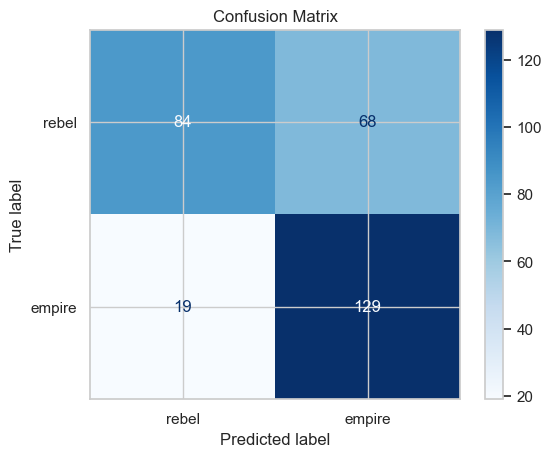

In [493]:
y_pred = tree_pipeline.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['rebel','empire'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [494]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a pipeline with Gradient Boosting
gradient_boosting_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('classifier', GradientBoostingClassifier(
        n_estimators=50,          # Number of boosting stages
        learning_rate=0.1,         # Learning rate
        max_depth=15,               # Maximum depth of each tree
        min_samples_leaf=5,        # Minimum samples per leaf
        subsample=0.8,             # Fraction of samples used for fitting individual base learners
        random_state=42            # Random state for reproducibility
    ))
])

# Fit the pipeline to the training data
gradient_boosting_pipeline.fit(X_train, y_train)
gradient_boosting_pipeline.score(X_test,y_test)

0.71

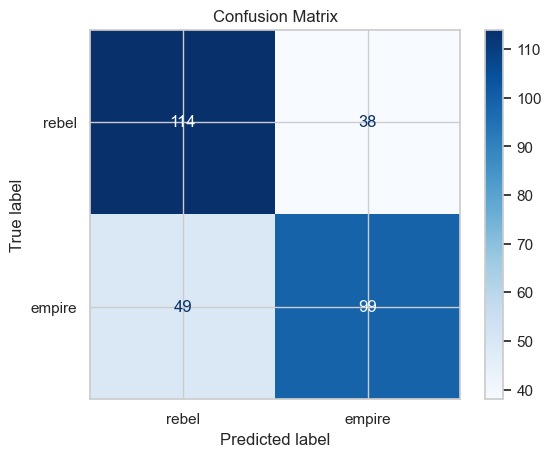

In [495]:
y_pred = gradient_boosting_pipeline.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['rebel','empire'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [496]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import random

# Assuming X_train, y_train, X_test are already defined

# Create pipelines for each model


# Make predictions
gb_predictions = gradient_boosting_pipeline.predict(X_test)
dt_predictions = tree_pipeline.predict(X_test)
log_predictions = log_pipeline.predict(X_test)

# Combine predictions
combined_predictions = []
for gb_pred, dt_pred, log_pred in zip(gb_predictions, dt_predictions, log_predictions):
    if gb_pred == 0:
        combined_predictions.append(gb_pred)
    elif dt_pred == 1:
        combined_predictions.append(dt_pred)
    else:
        # If predictions intersect, randomly choose one
        combined_predictions.append(log_pred)

# Convert to numpy array for consistency
combined_predictions = np.array(combined_predictions)

# Now you can use combined_predictions for evaluation


In [497]:
sum(combined_predictions==y_test)/len(combined_predictions)

0.7133333333333334

In [498]:
from sklearn.metrics import confusion_matrix

# Assuming y_test is the true labels for X_test

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, combined_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[115  37]
 [ 49  99]]


In [499]:
default = DecisionTreeClassifier()
default.fit(X_train, y_train)
default.score(X_test, y_test)

0.62

In [500]:
default.get_depth()

48

In [501]:
log_pipeline = Pipeline([
        ('scaler', StandardScaler()),          # Step 1: Standardize the data
        ('classifier', LogisticRegression())  # Step 3: Fit Decision Tree Classifier
    ])
log_pipeline.fit(X_train, y_train)
log_pipeline.score(X_test,y_test)

0.71

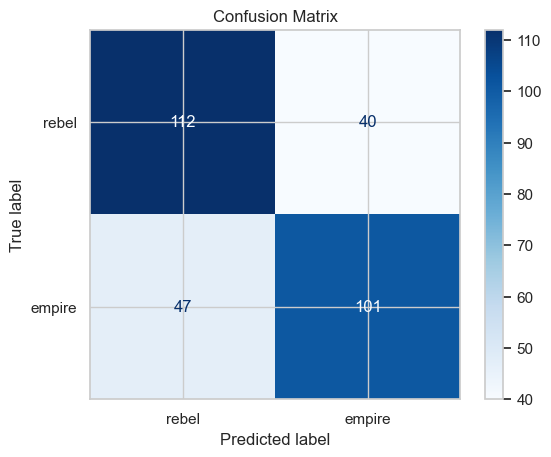

In [502]:
y_pred = log_pipeline.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['rebel','empire'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Calculate Feature Importance

In [503]:
importances = clf.feature_importances_
feature_importances = pd.DataFrame({'feature':X_train.columns, 'importance':importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

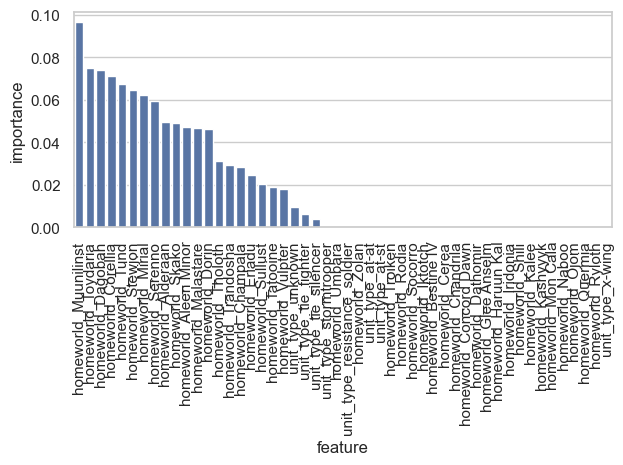

In [504]:
sns.barplot(data=feature_importances, x='feature', y='importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

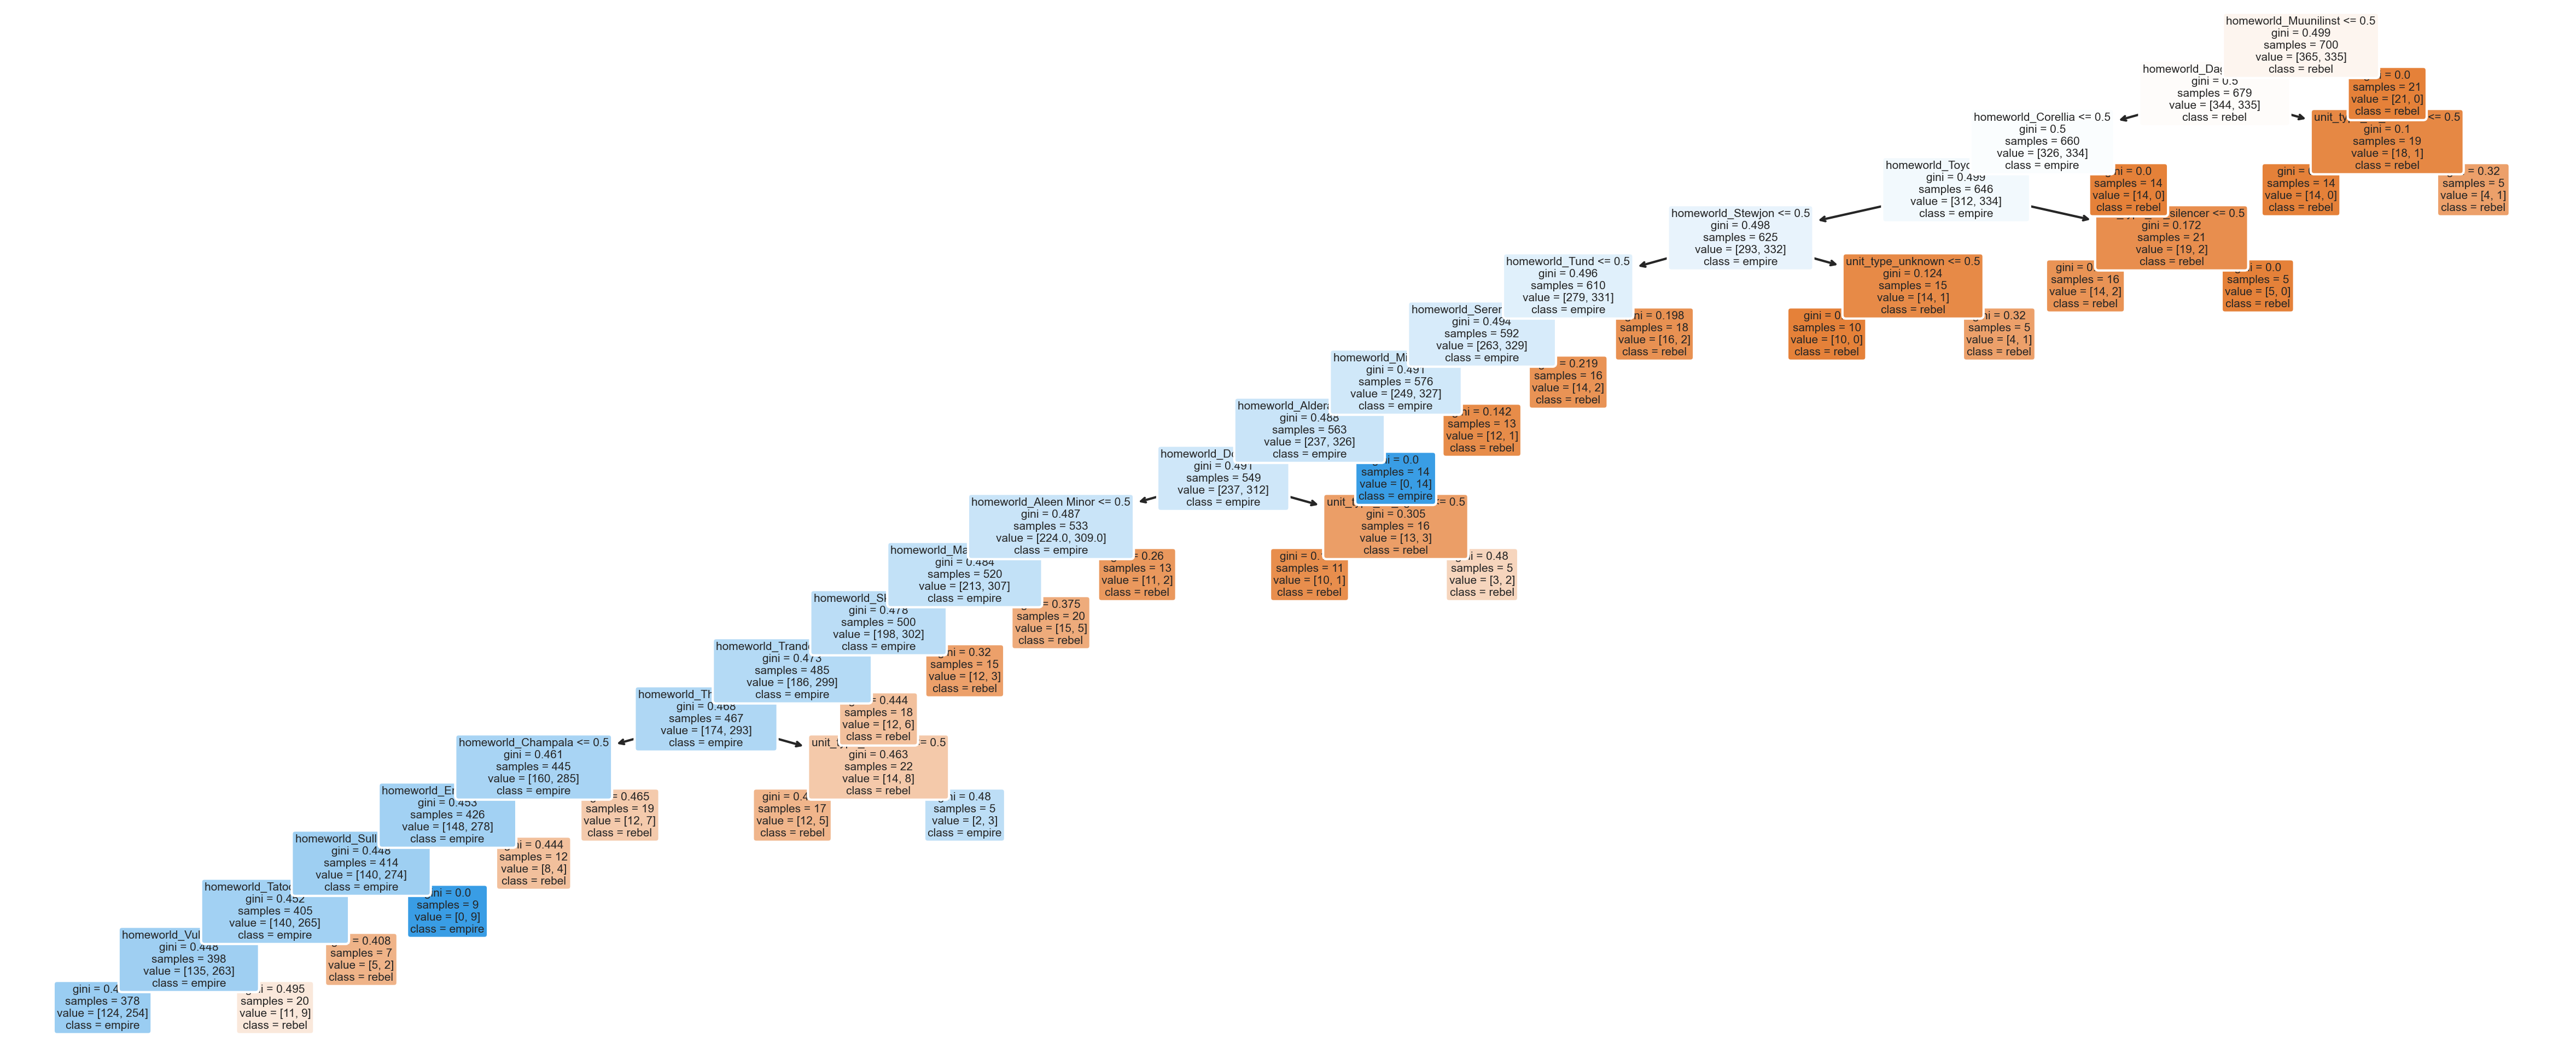

In [505]:
plt.figure(figsize=(20, 8), dpi=300)  # Increase dpi for higher resolution

# Plot the tree with increased text size
plot_tree(clf, 
          feature_names=feature_importances.feature,  # Optional: for better labels
          class_names=['rebel','empire'],
          filled=True,                                # Optional: color nodes by class/value
          rounded=True,                               # Optional: round node boxes
          fontsize=5)                                 # Set the fontsize to 5

plt.show()

## Export Model

In [507]:
output = "../model/decision_tree_pipeline.pkl"
with open(output, 'wb') as f:
    pkl.dump(tree_pipeline,f)